In [1]:
library(dplyr)
library(tabplot)
library(discretization)
library(pryr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Loading required package: ff
Attaching package ff
- getOption("fftempdir")=="/var/folders/9d/ql46h1757fsff_cwqg8kymm40000gn/T//RtmpqUFu7a"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption

In [38]:
raw <- read.csv("../data/middle/sp2.csv", stringsAsFactors=FALSE)
df <- raw

In [27]:
names(df)

[1] "Time"              "Longitude"         "Latitude"         
 [4] "Speed"             "Brake"             "Accel"            
 [7] "Engine"            "AheadDistance"     "Curve150"         
[10] "Curve100"          "Curve"             "SteeringAngle"    
[13] "BranchFlag"        "DistTollgate"      "RoadType"         
[16] "GreenLamp"         "RedLamp"           "RightLamp"        
[19] "UpLamp"            "LeftLamp"          "StopSign"         
[22] "Limit30Sign"       "Limit50Sign"       "BrakeCar"         
[25] "LeftCar"           "ManBicycleCount"   "ManBicycle"       
[28] "DistManBicycle"    "Pitch"             "DistSignal"       
[31] "PathType"          "LaneCount"         "AccelerationSpeed"
[34] "Jerk"              "TimeHeadway"       "TimeToCollision"  
[37] "RiskFactor"        "AverageVelocity"   "CurveAverage"     
[40] "flag"

In [28]:
invalids <- c('Time', 'Longitude', 'Latitude', 'Brake', 'Accel', 'flag', 'Curve100', 'Curve150')

In [29]:
availColumns <- c('Speed', 'AheadDistance', 'AverageVelocity', 'TimeHeadway', 'RoadType', 'TimeToCollision', 'RiskFactor',
                  'CurveAverage', 'Curve', 'Engine', 'Pitch', 'SteeringAngle', 'DistSignal', 'AccelerationSpeed', 'LaneCount', 'Jerk', 'PathType')

In [30]:
automateColumns <- c("Speed", "AheadDistance", "CurveAverage", "DistSignal", "Pitch", "TimeHeadway", "LaneCount", "AccelerationSpeed", "Jerk", "Curve", "Engine")
manualColumns <- c("AverageVelocity", "RiskFactor", "SteeringAngle", "Pitch")

In [31]:
df$flag[df$flag == "RedA"] <- "Red"
df$flag[df$flag == "RedB"] <- "Red"
df$flag[df$flag == "BlueA"] <- "Blue"
df$flag[df$flag == "BlueB"] <- "Blue"
df$flag <- as.factor(df$flag)

In [32]:
highOuter <- function(firstQu, thirdQu) thirdQu + 1.5*(thirdQu - firstQu)
lowOuter <- function(firstQu, thirdQu) firstQu - 1.5*(thirdQu - firstQu)

In [33]:
thresholdOrIdentity <- function(operator, thresholdFunc, firstQu, thirdQu, val) {
    threshold <- thresholdFunc(firstQu, thirdQu)
    if (do.call(operator, list(val, threshold)))
        return(val)
    return(threshold)
}
    
highOrIdentity <- pryr::partial(thresholdOrIdentity, "<", highOuter)
lowOrIdentity <- pryr::partial(thresholdOrIdentity, ">", lowOuter)

In [34]:
rmOutlier <- function(thresholdFunc, df, col) {
    quant <- quantile(df[[col]])
    firstQu <- quant[2]
    thirdQu <- quant[4]
    idx <- match(col, names(df))
    apply(select(df, idx), 1, pryr::partial(thresholdFunc, firstQu, thirdQu))
}

In [148]:
rmHighOutlier <- partial(rmOutlier, highOrIdentity)
rmLowOutlier <- partial(rmOutlier, lowOrIdentity)

In [149]:
# df[automateColumns] <- sapply(automateColumns, function(x) rmHighOutlier(df, x))
# df[automateColumns] <- sapply(automateColumns, function(x) rmLowOutlier(df, x))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


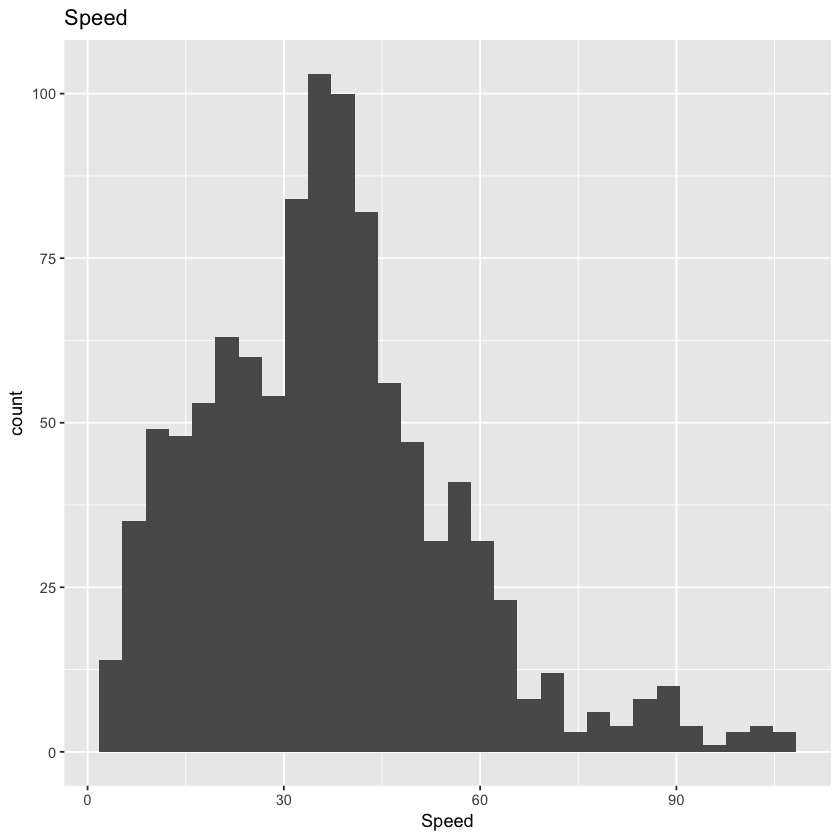

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


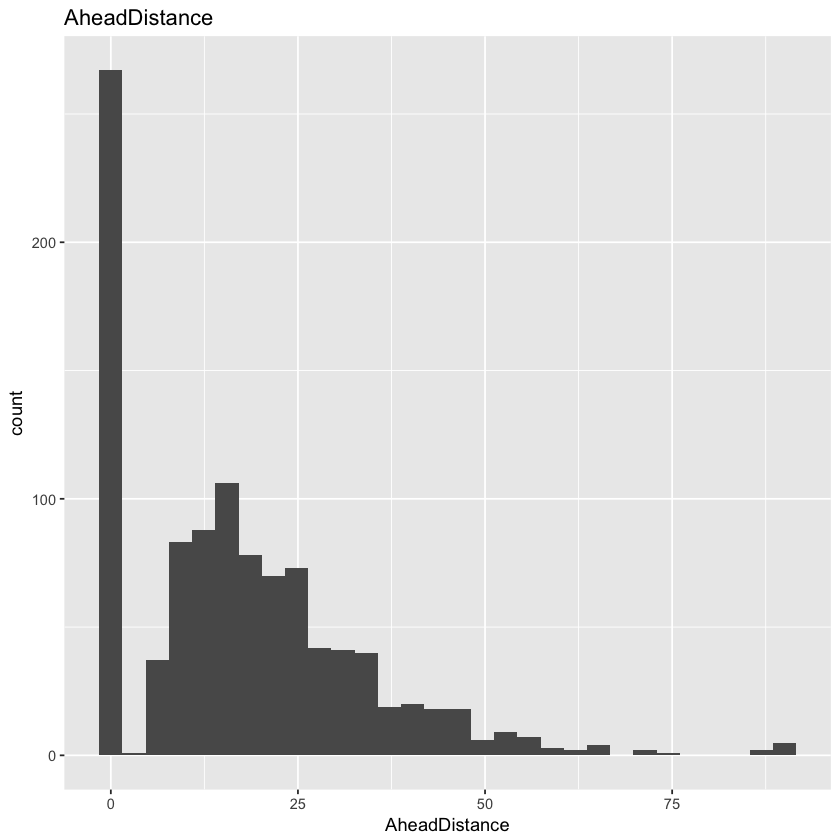

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


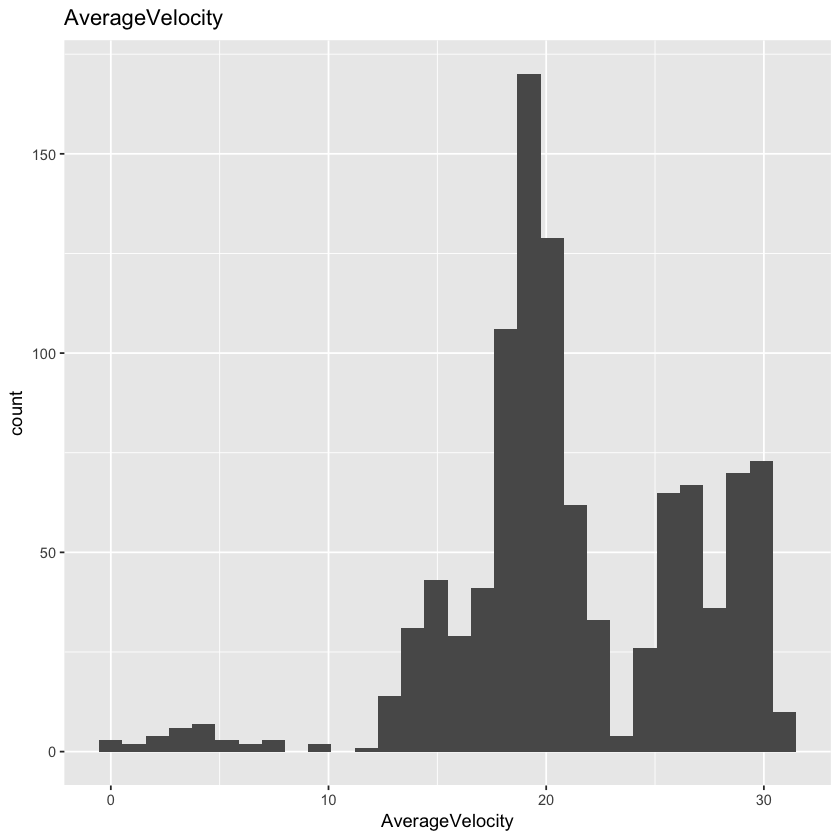

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


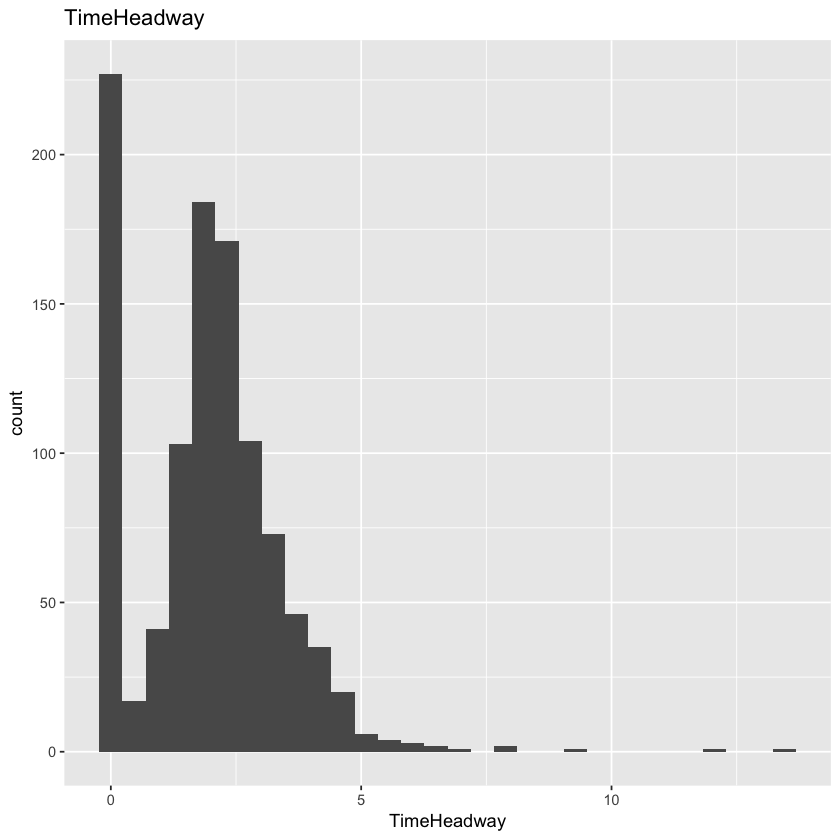

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


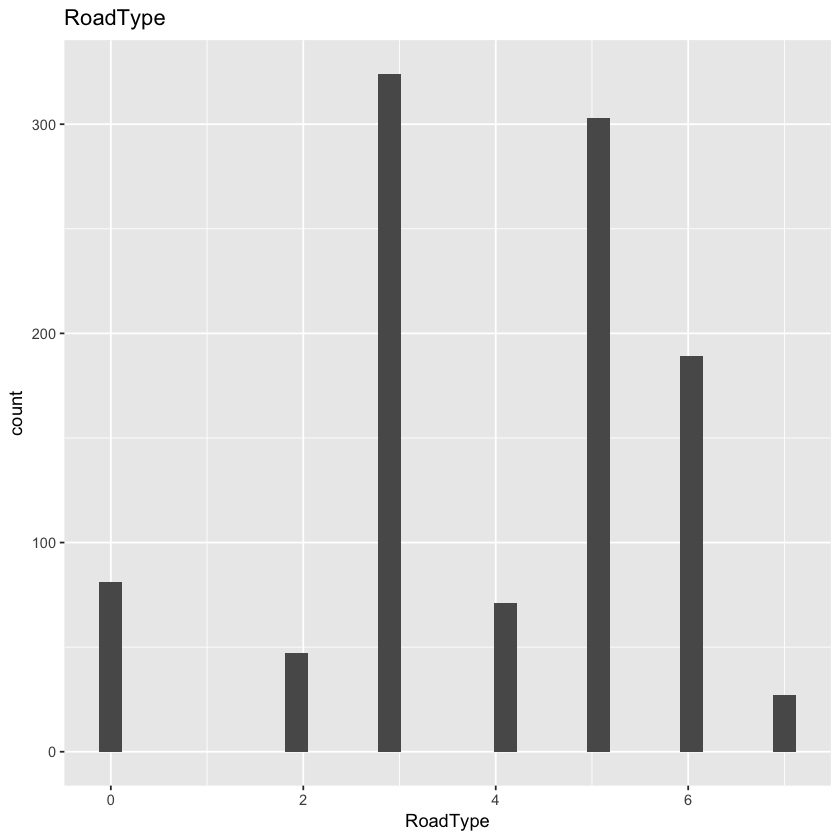

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


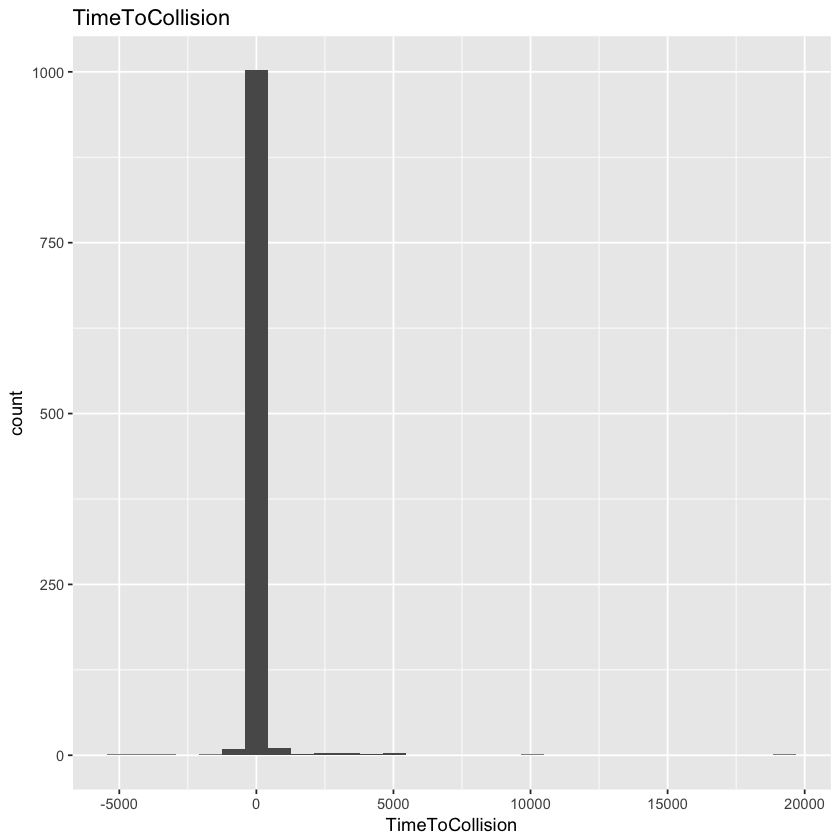

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


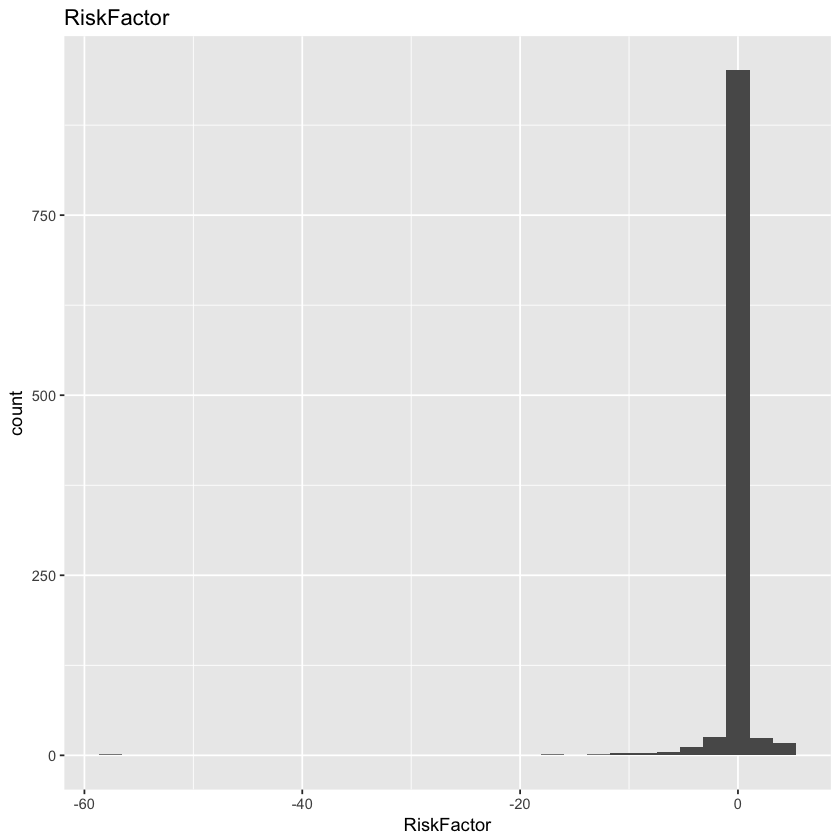

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


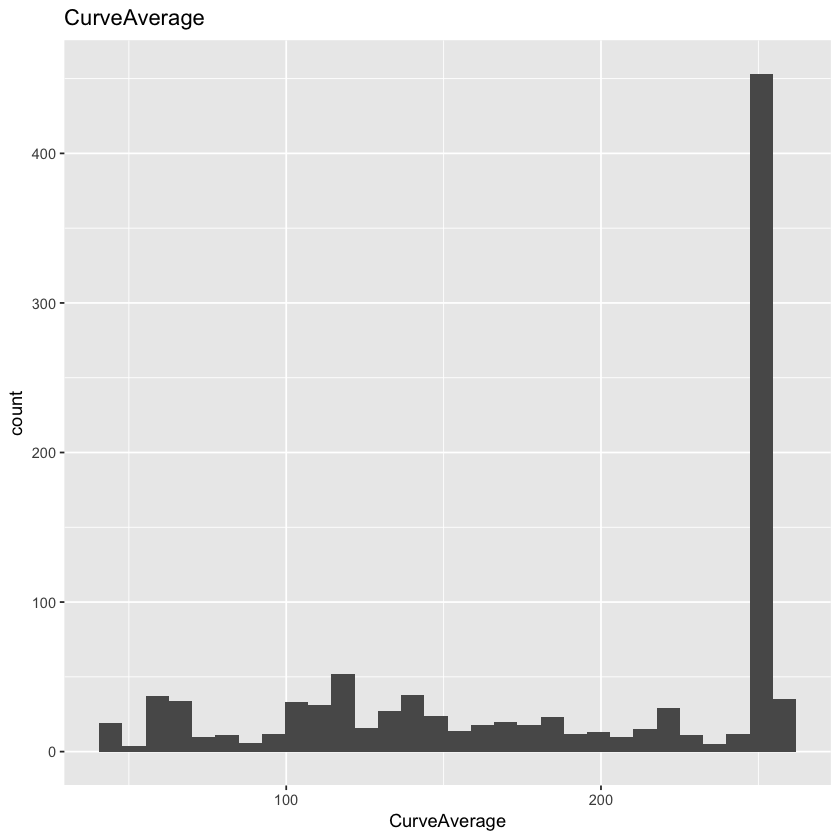

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


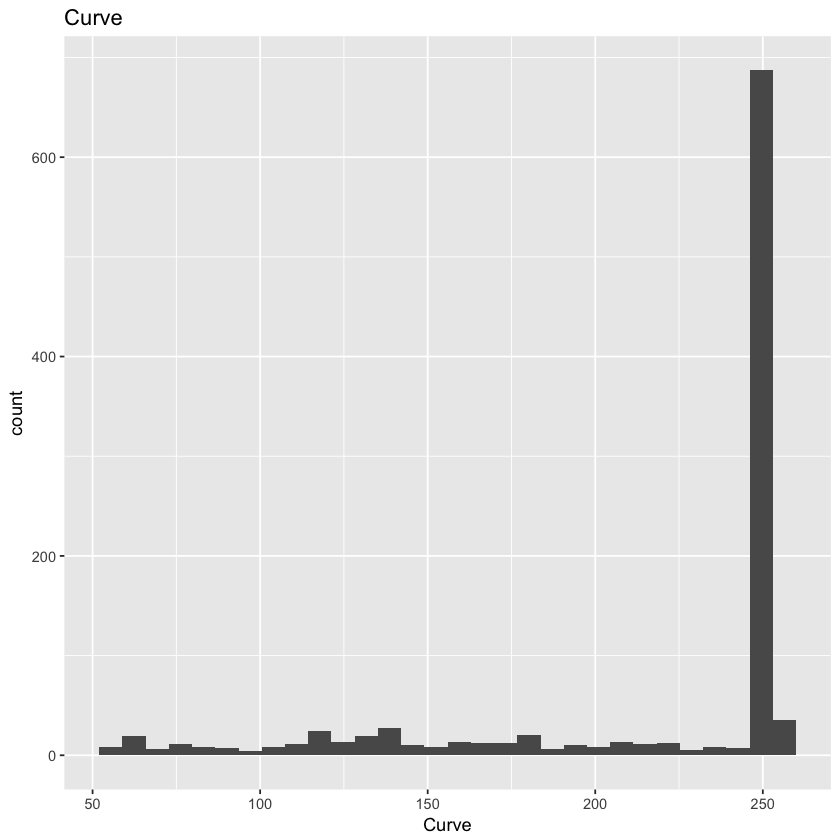

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


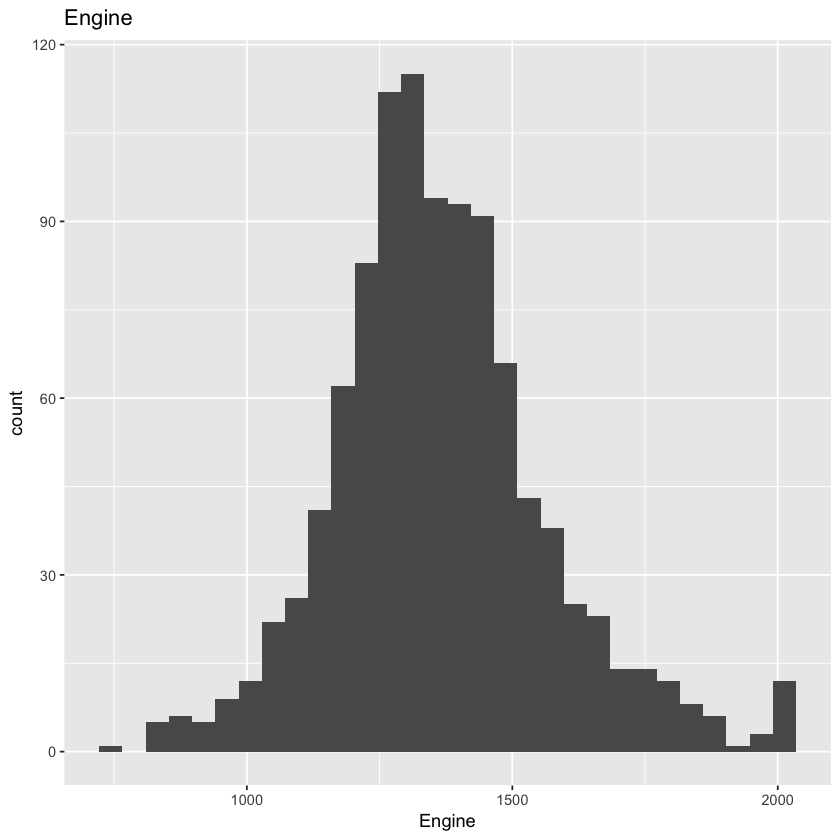

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


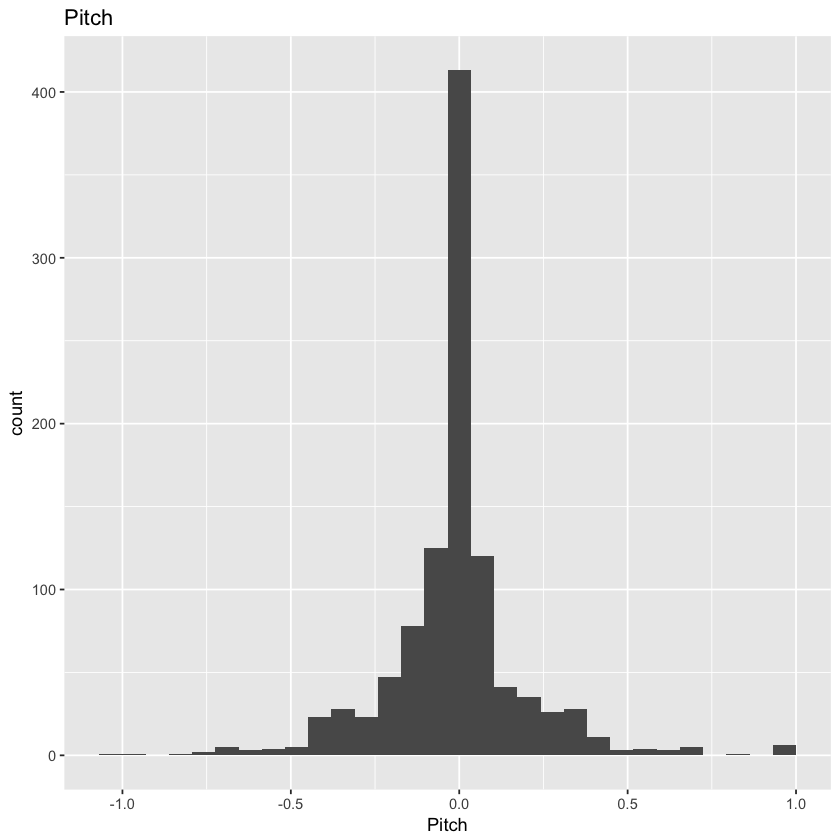

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


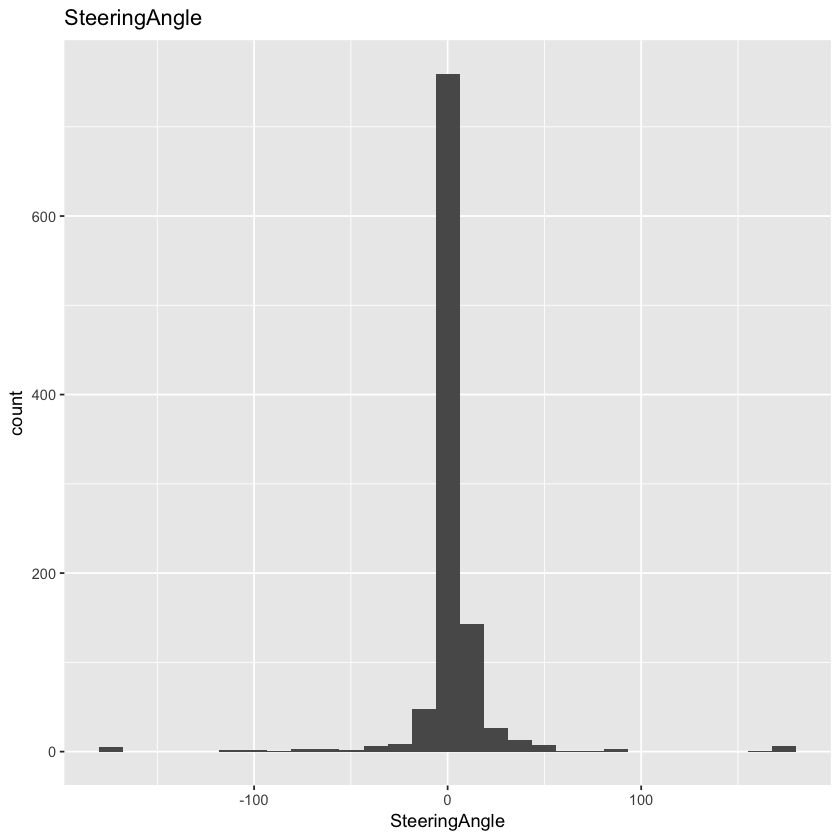

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


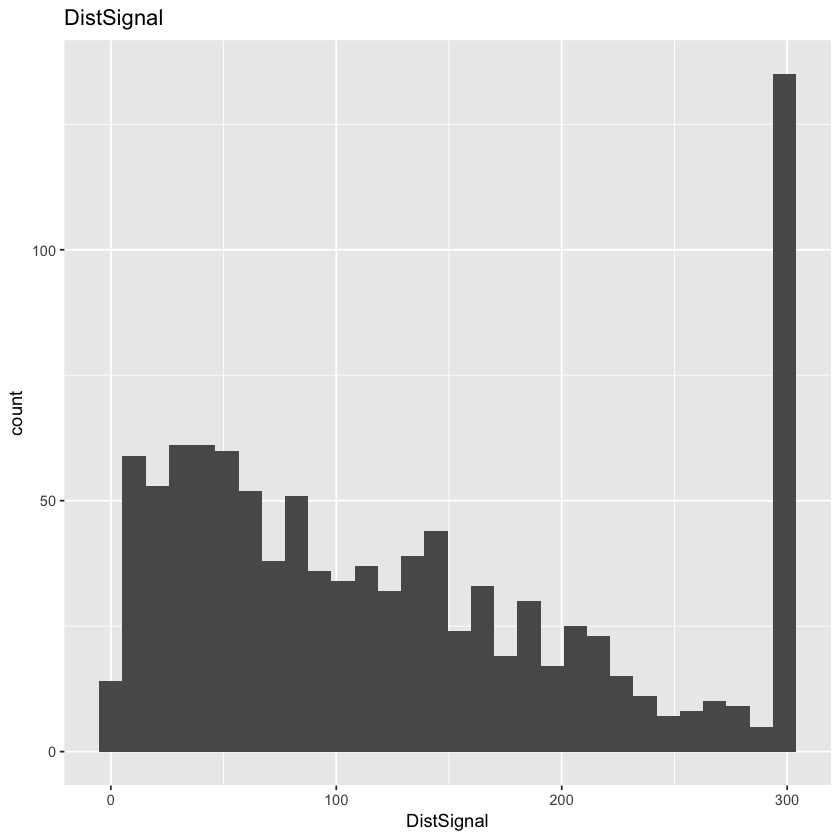

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


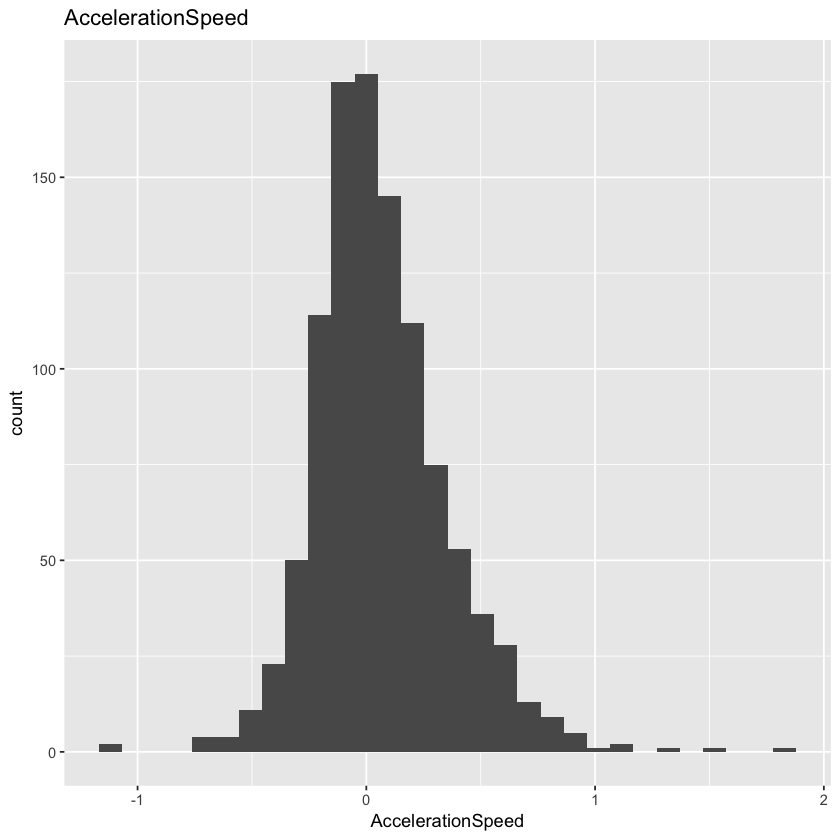

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


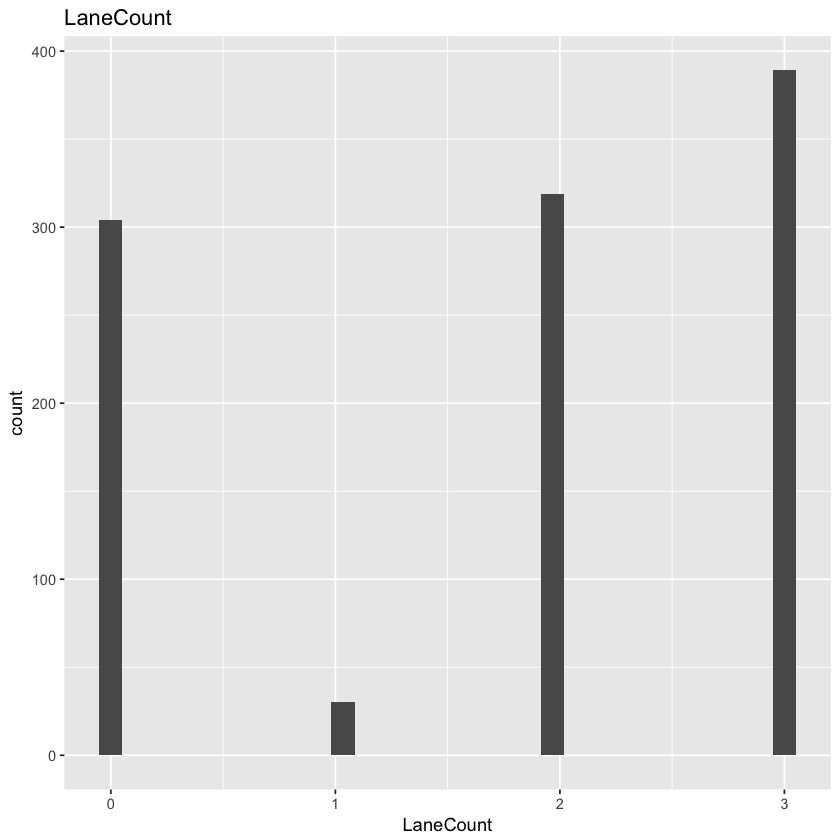

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


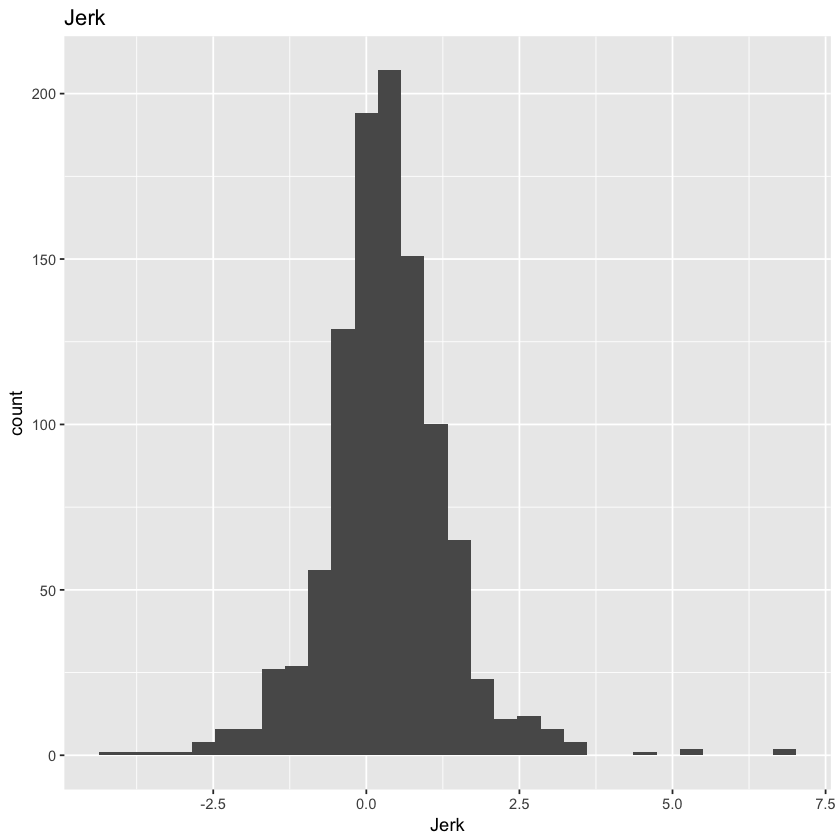

Speed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

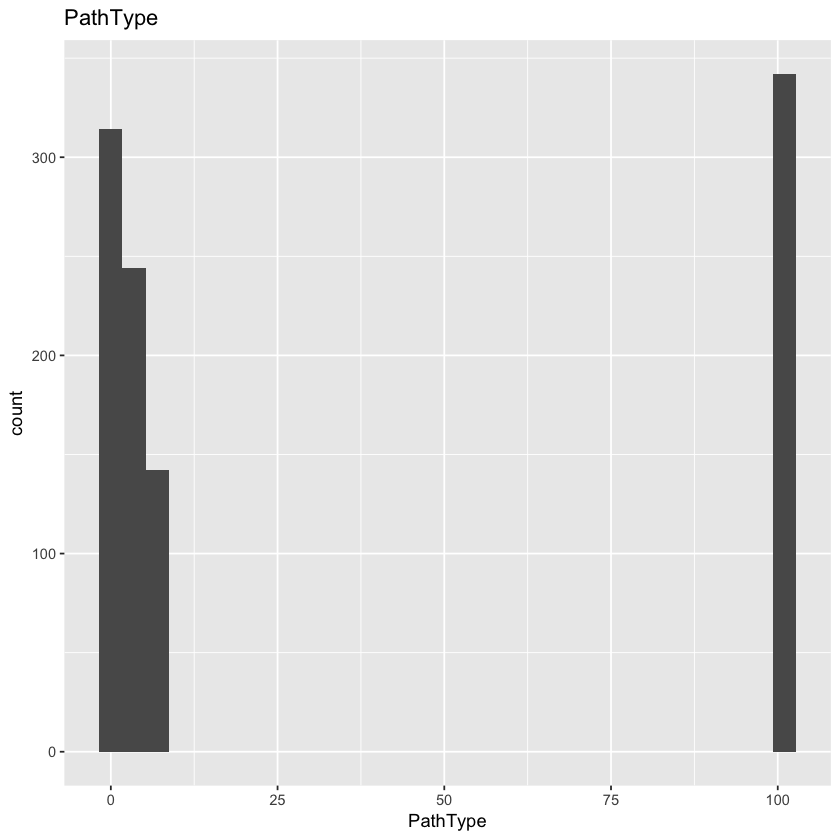

In [150]:
showHists <- function(dfx, col) {
    plot <- qplot(df[[col]], geom="histogram", main=col, xlab=col)
    # ggsave(plot, file=cat(col, ".png", sep=""))
    print(plot)
}
sapply(availColumns, function(x) showHists(df, x))

# Threshold

In [151]:
thresholdOrIdentity <- function(operator, threshold, val) {
    if (do.call(operator, list(val, threshold)))
        return(val)
    return(threshold)
}

In [152]:
df <- raw

# DistSignal

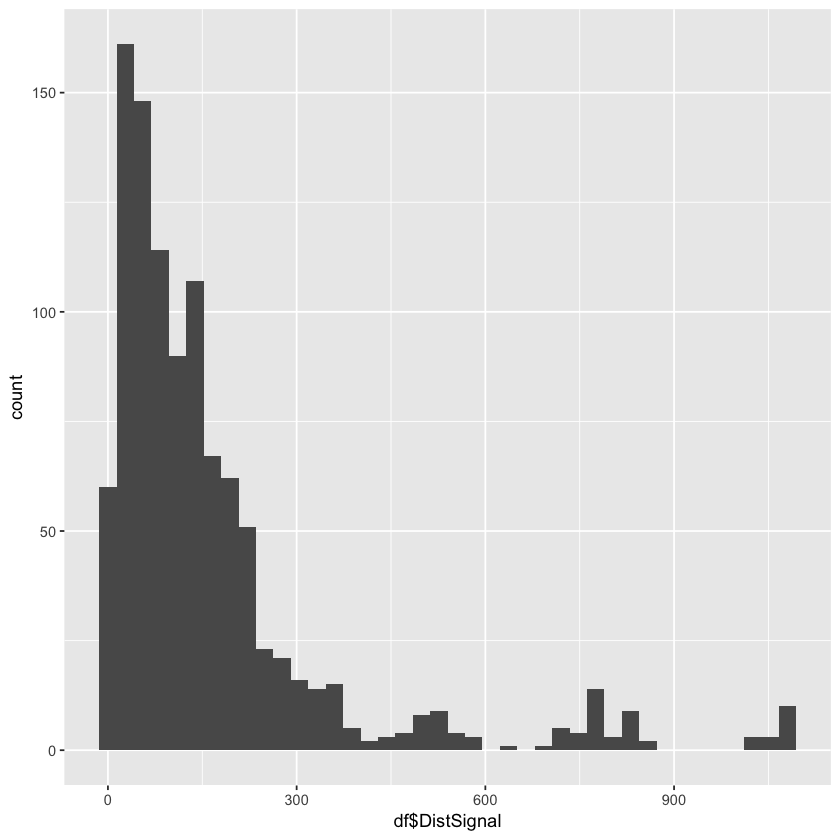

In [153]:
p <- qplot(df$DistSignal, geom="histogram", bins=40)
print(p)

In [154]:
df$DistSignal <- sapply(df$DistSignal, FUN=pryr::partial(thresholdOrIdentity, "<", 300))
summary(df$DistSignal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.22   49.11  109.00  128.90  192.80  300.00 

# Engine

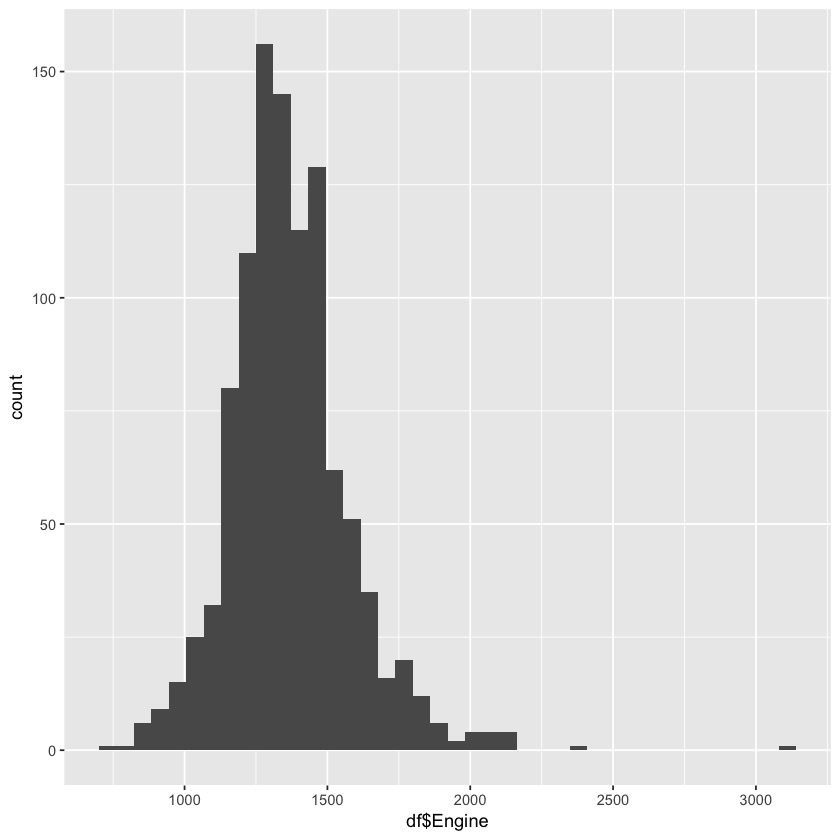

In [155]:
p <- qplot(df$Engine, geom="histogram", bins=40)
print(p)

In [156]:
df$Engine <- sapply(df$Engine, FUN=pryr::partial(thresholdOrIdentity, "<", 2000))
summary(df$Engine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  731.2  1241.0  1347.0  1365.0  1472.0  2000.0 

# PathType ( VC_NaviCls )

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


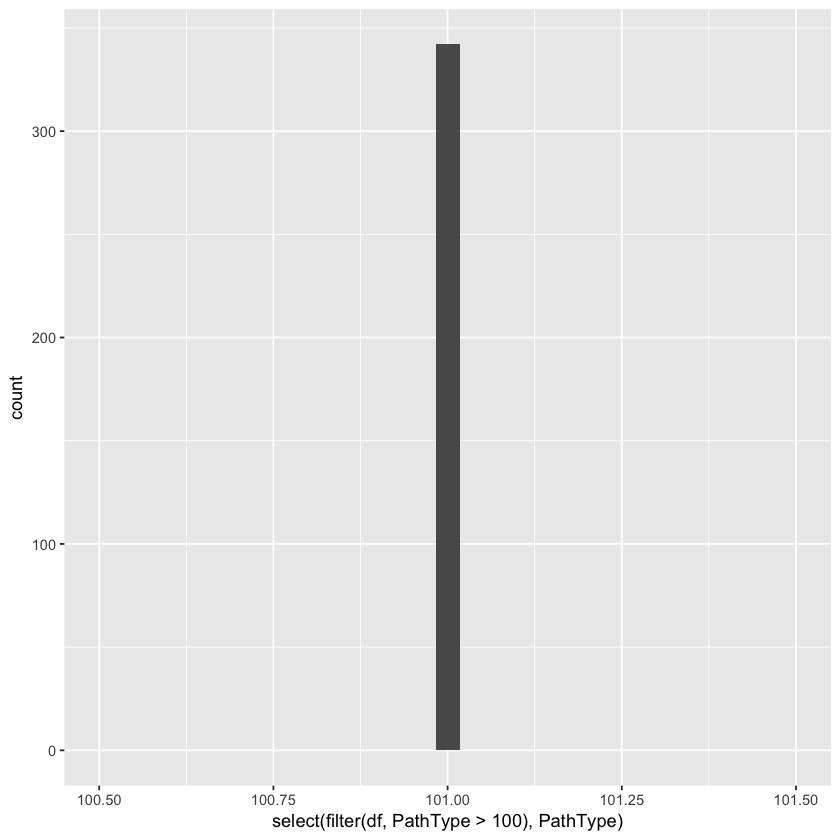

In [157]:
p <- qplot(select(filter(df, PathType > 100), PathType), geom="histogram")
print(p)

# Pitch

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.4870000 -0.0768700  0.0002488 -0.0039820  0.0403000  2.4840000 

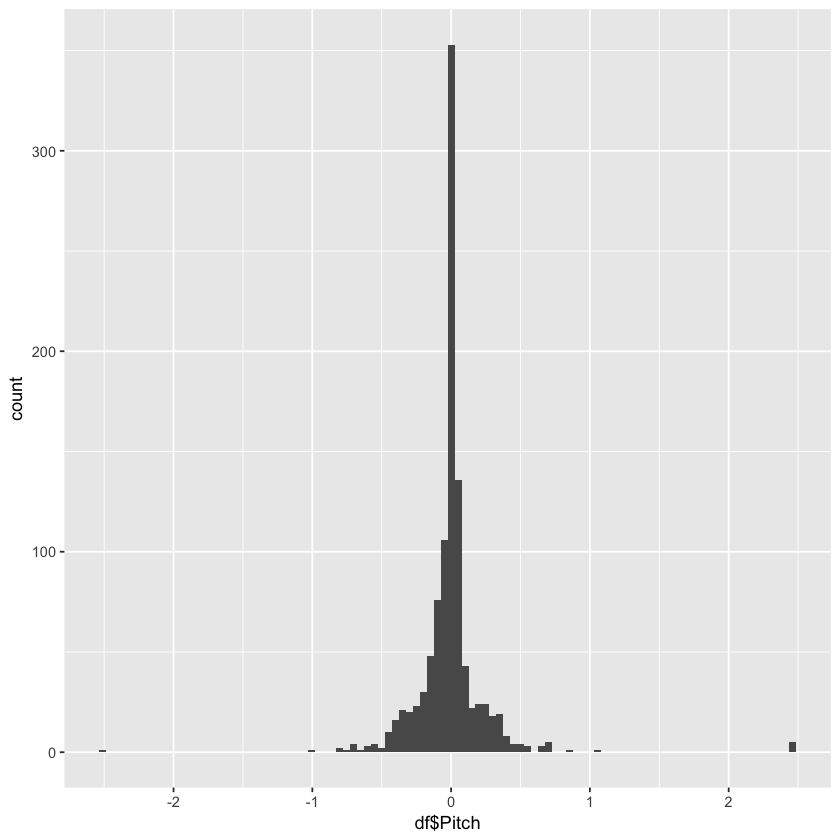

In [158]:
summary(df$Pitch)
p <- qplot(df$Pitch, geom="histogram", bins=100)
print(p)

In [159]:
df$Pitch <- sapply(df$Pitch, FUN=pryr::partial(thresholdOrIdentity, "<", 1))
df$Pitch <- sapply(df$Pitch, FUN=pryr::partial(thresholdOrIdentity, ">", -1))
summary(df$Pitch)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.0000000 -0.0768700  0.0002488 -0.0097070  0.0403000  1.0000000 

# SteeringAngle

In [160]:
df$SteeringAngle <- sapply(df$SteeringAngle, FUN=pryr::partial(thresholdOrIdentity, "<", 180))
df$SteeringAngle <- sapply(df$SteeringAngle, FUN=pryr::partial(thresholdOrIdentity, ">", -180))
summary(df$SteeringAngle)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-180.000    1.400    3.000    3.184    4.900  180.000 

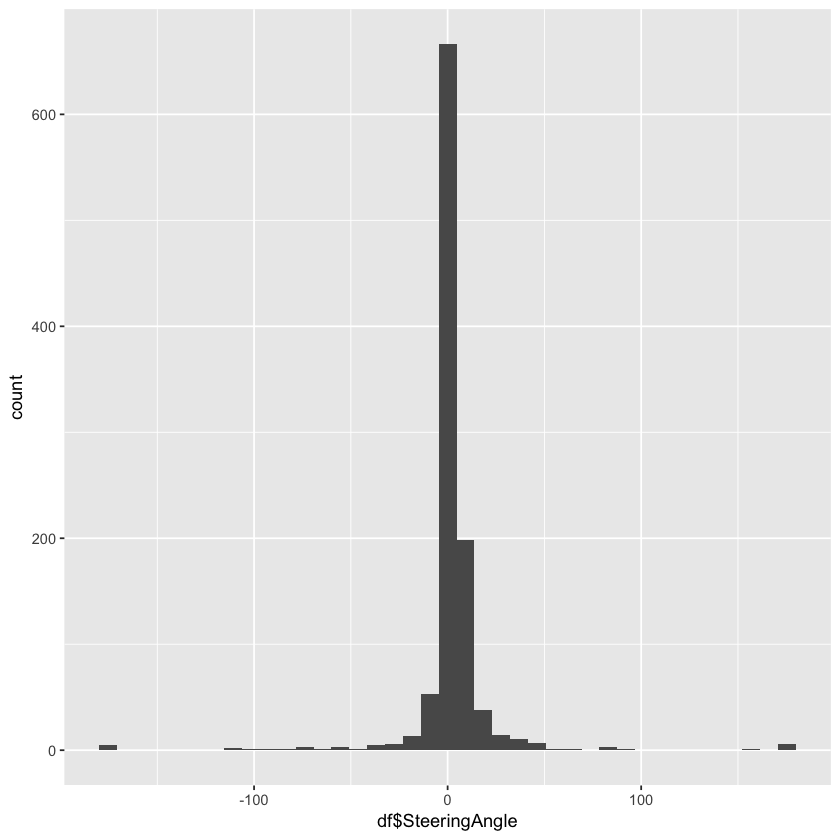

In [176]:
p <- qplot(df$SteeringAngle, geom="histogram", bins=40, xlim = c(-180, 180))
print(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   15.05   17.34   25.20  115.20 

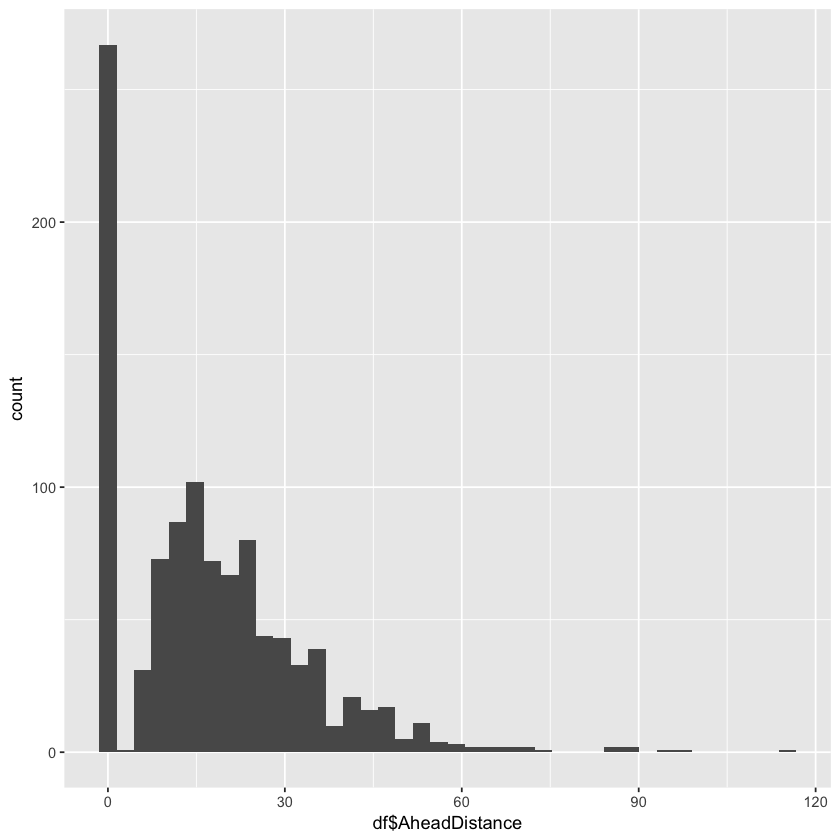

In [162]:
summary(df$AheadDistance)
p <- qplot(df$AheadDistance, geom="histogram", bins=40)
print(p)

In [173]:
df$AheadDistance <- sapply(df$AheadDistance, FUN=pryr::partial(thresholdOrIdentity, "<", 90))
df$AheadDistance[df$AheadDistance == 0] <- 90
summary(df$AheadDistance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20   15.30   25.50   40.37   90.00   90.00 

In [177]:
summary(df)

      Time          Longitude        Latitude         Speed            Brake  
 Min.   :  46.3   Min.   :139.3   Min.   :35.40   Min.   :  2.89   Min.   :0  
 1st Qu.:2036.0   1st Qu.:139.4   1st Qu.:35.43   1st Qu.: 22.93   1st Qu.:0  
 Median :3621.2   Median :139.4   Median :35.44   Median : 35.55   Median :0  
 Mean   :3616.8   Mean   :139.4   Mean   :35.46   Mean   : 36.78   Mean   :0  
 3rd Qu.:5234.0   3rd Qu.:139.5   3rd Qu.:35.49   3rd Qu.: 46.45   3rd Qu.:0  
 Max.   :7693.1   Max.   :139.5   Max.   :35.51   Max.   :105.85   Max.   :0  
     Accel        Engine       AheadDistance      Curve150        Curve100    
 Min.   :-1   Min.   : 731.2   Min.   : 3.20   Min.   : 41.0   Min.   : 41.0  
 1st Qu.:-1   1st Qu.:1240.6   1st Qu.:15.30   1st Qu.:200.0   1st Qu.:203.2  
 Median :-1   Median :1346.9   Median :25.50   Median :251.0   Median :251.0  
 Mean   :-1   Mean   :1365.2   Mean   :40.37   Mean   :218.5   Mean   :217.7  
 3rd Qu.:-1   3rd Qu.:1471.9   3rd Qu.:90.00   3rd Q